# Analysis of Recife Vaccination Data

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('vacinados - may 19.csv', sep= ';', encoding = 'ISO-8859-1')

In [3]:
raw_data.head()

,cpf,nome,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.457.304-**,JOSÃ BARBOSA DINIZ,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210114,2,03/04/2021,DRIVE THRU - BIG BOMPREÃO - BOA VIAGEM
1,***.457.304-**,JOSÃ BARBOSA DINIZ,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210052A,1,13/03/2021,DRIVE THRU GERALDÃO
2,***.556.154-**,LUIZ CAMILO DE SANTANA,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210093,2,01/04/2021,DRIVE THRU PARQUE DA MACAXEIRA
3,***.556.154-**,LUIZ CAMILO DE SANTANA,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,1,04/03/2021,DRIVE THRU PARQUE DA MACAXEIRA
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2,04/03/2021,CENTRO DE VACINAÃÃO PARQUE DE EXPOSIÃÃO


# data handling

### filtering data:

In [4]:
raw_data.columns

Index(['cpf', 'nome', 'grupo', 'vacina', 'lote', 'dose', 'data_vacinacao',
       'local_vacinacao'],
      dtype='object')

In [5]:
data = raw_data.loc[:, ['cpf', 'grupo', 'vacina', 'dose', 'data_vacinacao']] # all rows (:) but only from this list of columns
data.head(3)

,cpf,grupo,vacina,dose,data_vacinacao
0,***.457.304-**,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),2,03/04/2021
1,***.457.304-**,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),1,13/03/2021
2,***.556.154-**,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),2,01/04/2021


### renaming vaccines:

In [6]:
data['vacina'].unique()

array(['1 - CORONAVAC - SINOVAC (BUTANTAN)',
       '2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)',
       '3 - COMIRNATY (PFIZER)', '1- CORONAVAC - SINOVAC (BUTANTAN)'],
      dtype=object)

In [7]:
data['vacina'] = data['vacina'].replace(['1 - CORONAVAC - SINOVAC (BUTANTAN)', '1- CORONAVAC - SINOVAC (BUTANTAN)'], 'CORONAVAC')

In [8]:
data['vacina'] = data['vacina'].replace(['2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)', ' CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)'], 'CHADOX1NCOV-19')

In [9]:
data['vacina'] = data['vacina'].replace(['3 - COMIRNATY (PFIZER)'], 'COMIRNATY')

In [10]:
data['vacina'].unique()

array(['CORONAVAC', 'CHADOX1NCOV-19', 'COMIRNATY'], dtype=object)

### renaming groups:

In [11]:
data['grupo'].unique()

array(['TRABALHADORES DA SAÃ\x9aDE', 'IDOSOS', 'OUTRAS PRIORIDADES',
       'PESSOAS COM COMORBIDADES', 'TRABALHADORES DA EDUCAÃ\x87Ã\x83O',
       'GESTANTES E PUÃ\x89RPERAS',
       'GESTANTES E PUÃ\x89RPERAS NÃ\x83O RESIDENTES EM RECIFE'],
      dtype=object)

In [12]:
data['grupo'] = data['grupo'].replace(['PESSOAS COM COMORBIDADES'], 'COMORBIDADES')

In [13]:
data['grupo'] = data['grupo'].replace(['TRABALHADORES DA SAÃDE'], 'SAÚDE')

In [14]:
data['grupo'] = data['grupo'].replace(['OUTRAS PRIORIDADES'], 'OUTROS')

In [15]:
data['grupo'] = data['grupo'].replace(['TRABALHADORES DA EDUCAÃ\x87Ã\x83O'], 'EDUCAÇÃO')

In [16]:
data['grupo'] = data['grupo'].replace(['GRÃ\x81VIDAS E PUÃ\x89RPERAS', 'GESTANTES E PUÃ\x89RPERAS NÃ\x83O RESIDENTES EM RECIFE', 'GESTANTES E PUÃ\x89RPERAS'], 'GRÁVIDAS E PUÉRPERAS')

In [17]:
data['grupo'].unique()

array(['SAÚDE', 'IDOSOS', 'OUTROS', 'COMORBIDADES', 'EDUCAÇÃO',
       'GRÁVIDAS E PUÉRPERAS'], dtype=object)

In [18]:
data.head(3)

,cpf,grupo,vacina,dose,data_vacinacao
0,***.457.304-**,SAÚDE,CORONAVAC,2,03/04/2021
1,***.457.304-**,SAÚDE,CORONAVAC,1,13/03/2021
2,***.556.154-**,IDOSOS,CORONAVAC,2,01/04/2021


# query analysis with histograms
### *A histogram is an approximate representation of the distribution of numerical data.*

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### histogram with the proportion of "dose" class:

In [20]:
doses_proportion = data['dose'].value_counts(normalize= True).reset_index()
doses_proportion.columns = ['dose', 'proporção']
doses_proportion

,dose,proporção
0,1,0.648749
1,2,0.351251


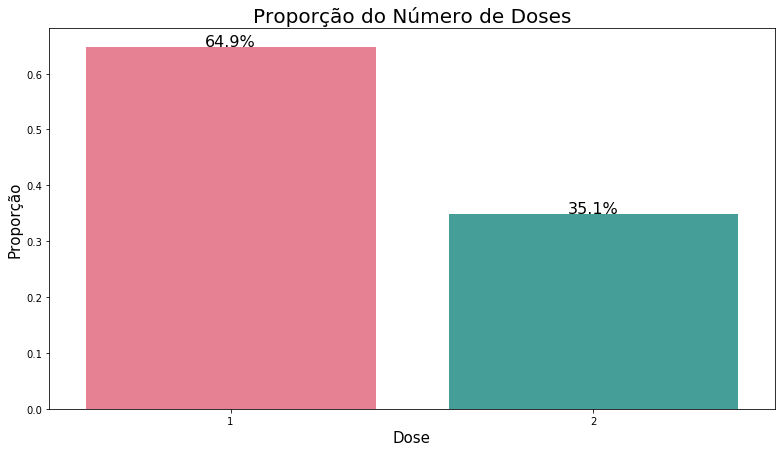

In [21]:
# figure and axis
fig, ax = plt.subplots(figsize=(13, 7))

# background style
sns.set_style('darkgrid')

# pallete with 2 colours
sns.set_palette(sns.color_palette('husl', 2))

# creating a graphic
sns.barplot(x= 'dose', y= 'proporção', data= doses_proportion, ax= ax)

# adding titles and changing font size
plt.title('Proporção do Número de Doses', fontsize= 20)
plt.xlabel('Dose', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

# percentages at the top of histograms
for index, row in doses_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.1%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

### possible interpretation: it is inferred that the amount of first doses is higher due to the decrease in the vaccination rate in May due to lack of vaccines.

In [22]:
doses_frequency = data["dose"].value_counts().reset_index()
doses_frequency.columns = ["dose", "frequência"]
doses_frequency.head()

,dose,frequência
0,1,387320
1,2,209706


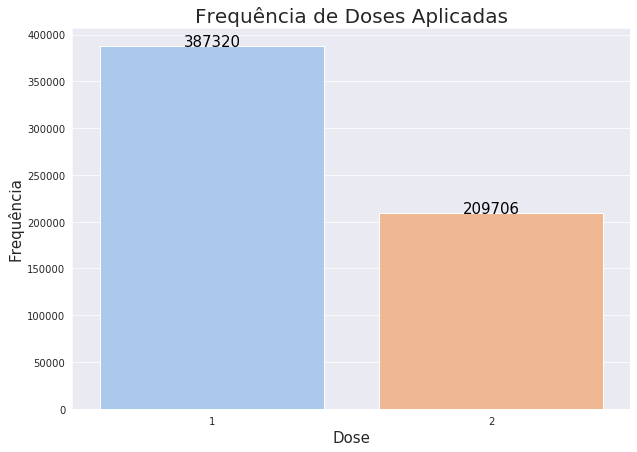

In [23]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("pastel", 2))

sns.barplot(x = "dose", y = "frequência", data = doses_frequency, ax = axis)

plt.title("Frequência de Doses Aplicadas", fontsize = 20)
plt.xlabel("Dose", fontsize = 15)
plt.ylabel("Frequência", fontsize = 15)

for index, row in doses_frequency.iterrows():
    axis.text(index, row["frequência"], "{}".format(row["frequência"]), color = "black", ha = "center", fontsize = 15)

plt.show()

### absolute values of doses applied until today (19/05/2021).

### histogram with the proportion of "vacina" class:

In [24]:
vaccines_proportion = data['vacina'].value_counts(normalize= True).reset_index()
vaccines_proportion.columns = ['vacina', 'proporção']
vaccines_proportion

,vacina,proporção
0,CORONAVAC,0.678302
1,CHADOX1NCOV-19,0.297511
2,COMIRNATY,0.024187


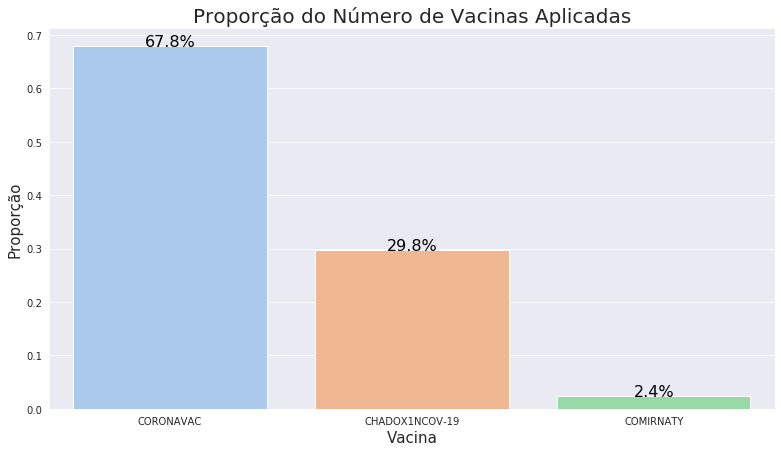

In [25]:
fig, ax = plt.subplots(figsize=(13, 7)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('pastel', 3))

sns.barplot(x= 'vacina', y= 'proporção', data= vaccines_proportion, ax= ax)

plt.title('Proporção do Número de Vacinas Aplicadas', fontsize= 20)
plt.xlabel('Vacina', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

for index, row in vaccines_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.1%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

## *possible interpretation: high adherence to the Brazilian vaccine underscores the power of Brazilian research.*

### histogram with the proportion of "grupo" class:

In [26]:
groups_proportion = data['grupo'].value_counts(normalize= True).reset_index()
groups_proportion.columns = ['grupo', 'proporção']
groups_proportion

,grupo,proporção
0,IDOSOS,0.696387
1,SAÚDE,0.243095
2,COMORBIDADES,0.025862
3,EDUCAÇÃO,0.021610
4,GRÁVIDAS E PUÉRPERAS,0.009313
5,OUTROS,0.003734


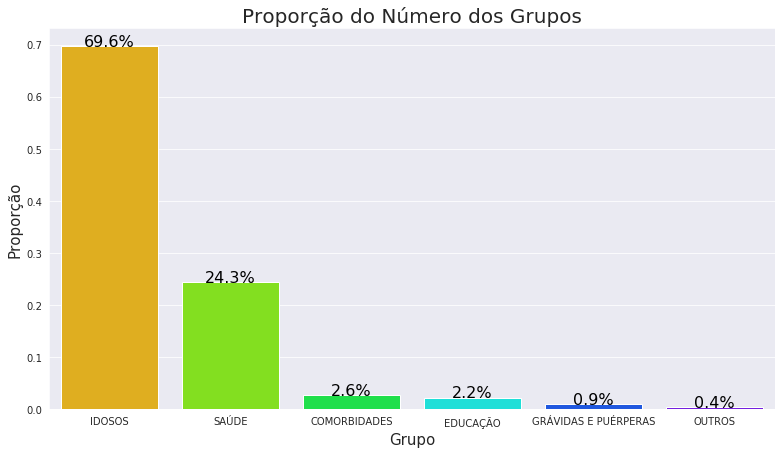

In [27]:
fig, ax = plt.subplots(figsize=(13, 7)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('hsv', 7))

sns.barplot(x= 'grupo', y= 'proporção', data= groups_proportion, ax= ax)

plt.title('Proporção do Número dos Grupos', fontsize= 20)
plt.xlabel('Grupo', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

for index, row in groups_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.1%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

## *possible interpretation: my conclusion is that the elderly are the priority group, but note that the healthcare professional group comes next and this fact is due to the high mortality rate in this group, too.*

# *groupwise analysis*

### most used vaccine in each group:

In [28]:
data.groupby('grupo').apply(lambda df: df['vacina'].value_counts().idxmax())

grupo
COMORBIDADES            CHADOX1NCOV-19
EDUCAÇÃO                CHADOX1NCOV-19
GRÁVIDAS E PUÉRPERAS         COMIRNATY
IDOSOS                       CORONAVAC
OUTROS                       CORONAVAC
SAÚDE                        CORONAVAC
dtype: object

### average of doses taken in each group:

In [29]:
data.groupby('grupo').apply(lambda df: df['dose'].mean())

grupo
COMORBIDADES            1.000000
EDUCAÇÃO                1.000000
GRÁVIDAS E PUÉRPERAS    1.000000
IDOSOS                  1.366598
OUTROS                  1.202782
SAÚDE                   1.391617
dtype: float64

### quantity of type of vaccine applied in each group:

In [30]:
data.groupby(['grupo', 'vacina']).size()

grupo                 vacina        
COMORBIDADES          CHADOX1NCOV-19      8071
                      COMIRNATY           7356
                      CORONAVAC             13
EDUCAÇÃO              CHADOX1NCOV-19     12763
                      COMIRNATY            126
                      CORONAVAC             13
GRÁVIDAS E PUÉRPERAS  CHADOX1NCOV-19         4
                      COMIRNATY           5555
                      CORONAVAC              1
IDOSOS                CHADOX1NCOV-19    127318
                      COMIRNATY            175
                      CORONAVAC         288268
OUTROS                CHADOX1NCOV-19       396
                      COMIRNATY            899
                      CORONAVAC            934
SAÚDE                 CHADOX1NCOV-19     29070
                      COMIRNATY            329
                      CORONAVAC         115735
dtype: int64